<a href="https://colab.research.google.com/github/nmuonko/My-Projects/blob/main/KNN%26NB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data = pd.read_csv("/content/ortho_knnnb.csv")

In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

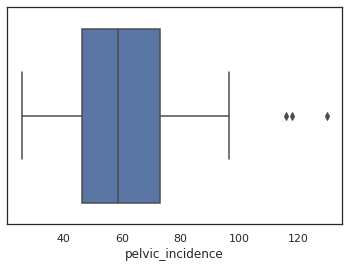

In [ ]:
sns.boxplot(data["pelvic_incidence"])

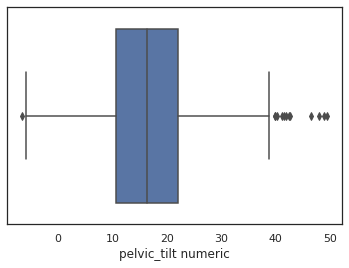

In [ ]:
sns.boxplot(data["pelvic_tilt numeric"])

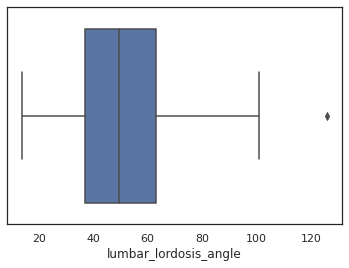

In [ ]:
sns.boxplot(data["lumbar_lordosis_angle"])


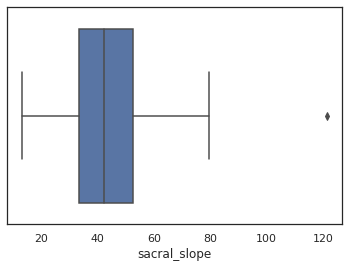

In [ ]:
sns.boxplot(data["sacral_slope"])

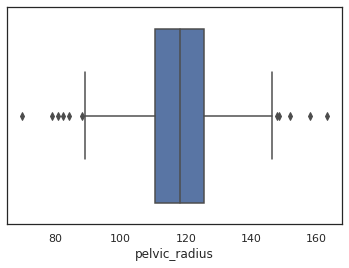

In [ ]:
sns.boxplot(data["pelvic_radius"])

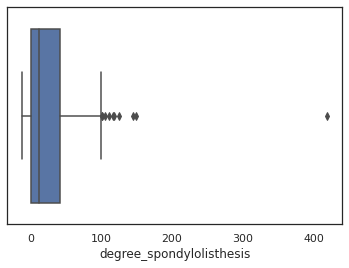

In [ ]:
sns.boxplot(data["degree_spondylolisthesis"])

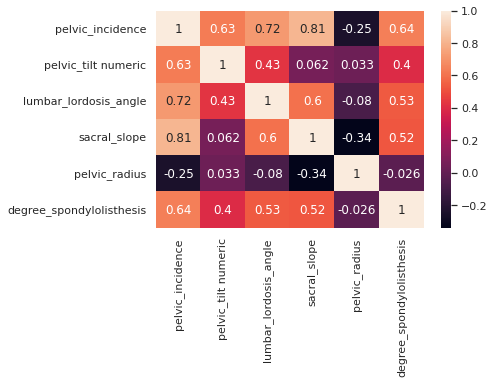

In [ ]:
corr_data = data.corr()
sns.heatmap(corr_data, annot=True)
plt.show()

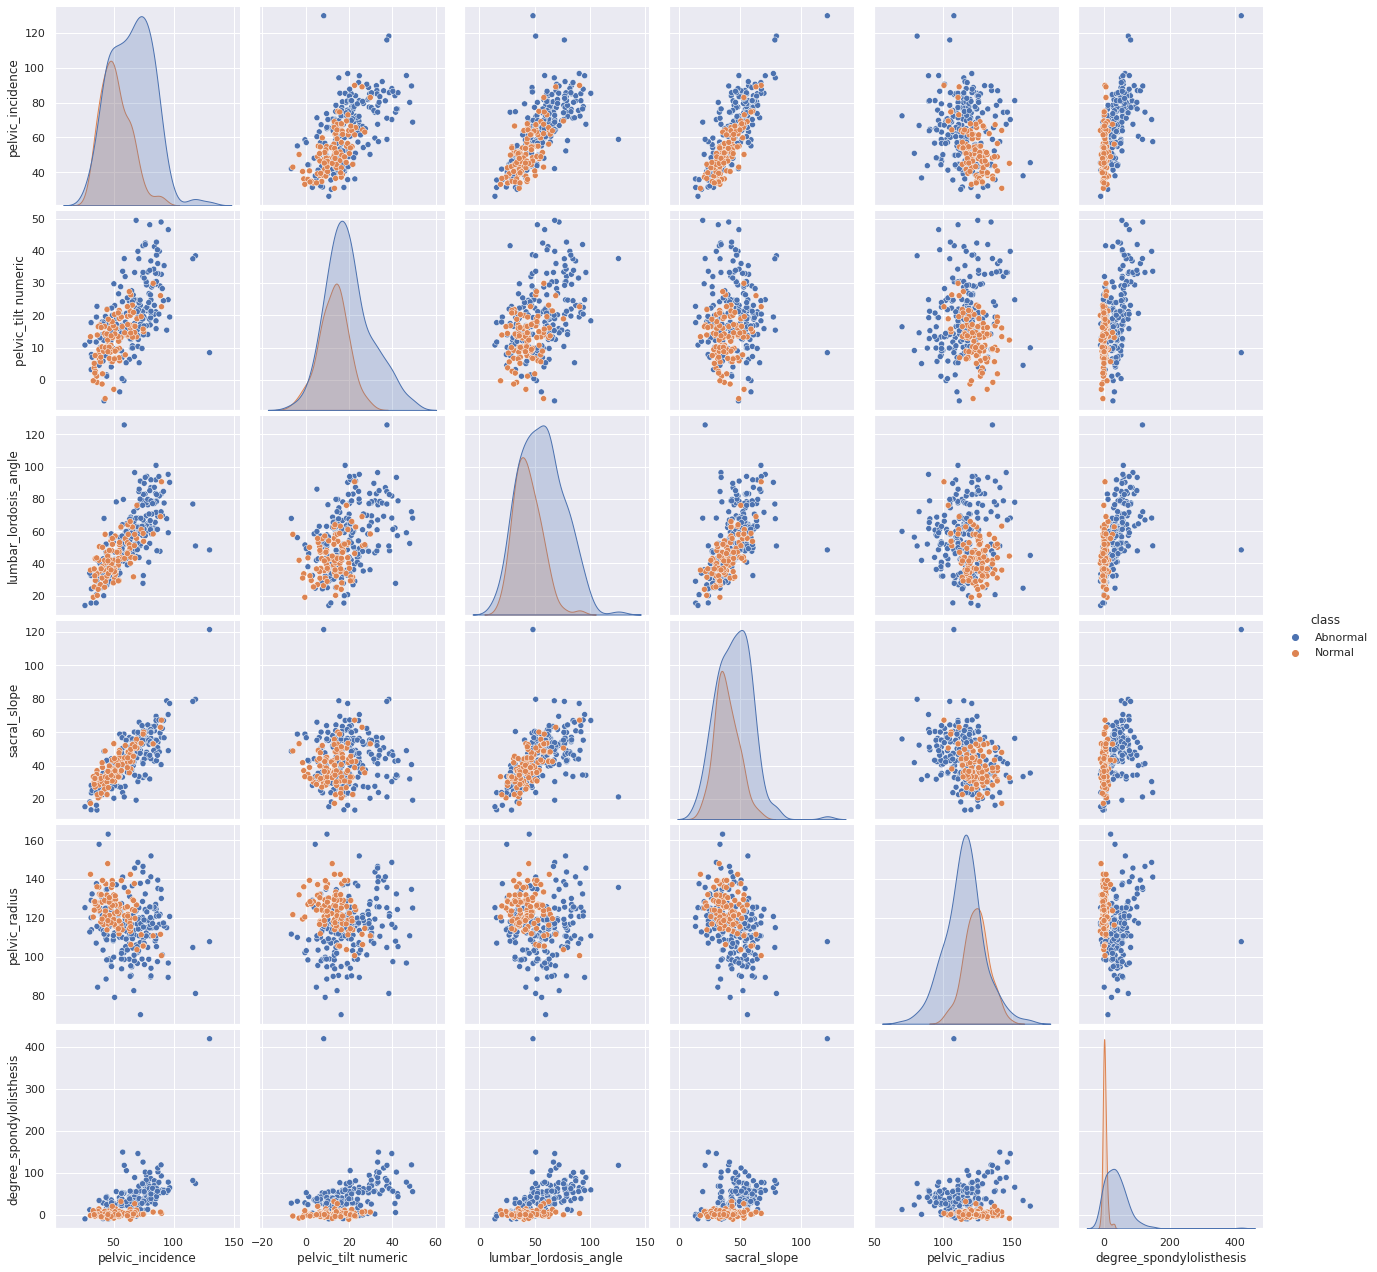

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data, hue="class", size=3)
plt.show()

In [ ]:
encoder = LabelEncoder()
data["symptom_class"] = encoder.fit_transform(data["class"])

In [ ]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,1


In [ ]:
X = data.iloc[:, :6]
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x= scaler.fit_transform(X)

In [ ]:
y = data.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: symptom_class, Length: 310, dtype: int64

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

In [ ]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
pred = KNN.predict(x_test)

In [ ]:
pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)

0.8064516129032258